In [34]:
import sys
print("Python version")
print (sys.version)

Python version
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## Data: x1, x2, x3, y 

In [36]:
x1 = np.array([203, 250, 220, 212, 212, 172, 225, 220, 217, 238, \
              199, 195, 222, 224, 229, 216, 201, 199, 227, 195, \
              192, 215, 203, 213, 221, 216, 228, 208, 202, 239, \
              204, 240, 209, 234, 247, 234, 222, 202, 211, 212, \
              241, 220, 226, 219] )

In [37]:
x2 = np.array([109, -6, -61, -272, -180,   33, -64, 79, 83, -85, \
              -78,  97, -69,    5,   47, -102, -91, 86, -96, -133, \
              1, -66, 44,  2, 158, 81, -8, -33, 33, -108, \
              134, 8, -18, 138, 166, 120, -16, -13, -48, 91, \
              8, 16, 41, 29])

In [38]:
x3 = np.array([105, 95, 90, 100, 149, 115, 108, 108, 99, 105,\
               105, 109, 140, 133, 149, 149, 105, 109, 140, 134, \
               105, 149, 113, 149, 105, 100, 99, 100, 105, 100,\
               99, 110, 105, 145, 90, 105, 120, 115, 105, 90,\
               90, 90, 90, 105])

In [39]:
y = np.array([446, 1000, 576, 496, 477, 349, 367, 398, 373, 570, \
              378, 416, 477, 364, 342, 388, 778, 526, 395, 370, \
              527, 497, 548, 407, 605, 269, 458, 775, 371, 550, \
              662, 512, 370, 481, 558, 478, 606, 433, 552, 466, \
              688, 522, 601, 705])

In [40]:
np.std(x1), np.std(x2), np.std(x3), np.std(y)

(15.854125828475185, 91.4370916835022, 18.695402603645547, 138.40770076925418)

In [41]:
X = np.array([x1, x2, x3]).T
XY = np.array([x1, x2, x3, y]).T

In [42]:
df = pd.DataFrame( XY, columns=['x1', 'x2', 'x3', 'y'])

C:\Users\wangsg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\wangsg\AppData\Local\Temp\ipykernel_65640\511865633.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


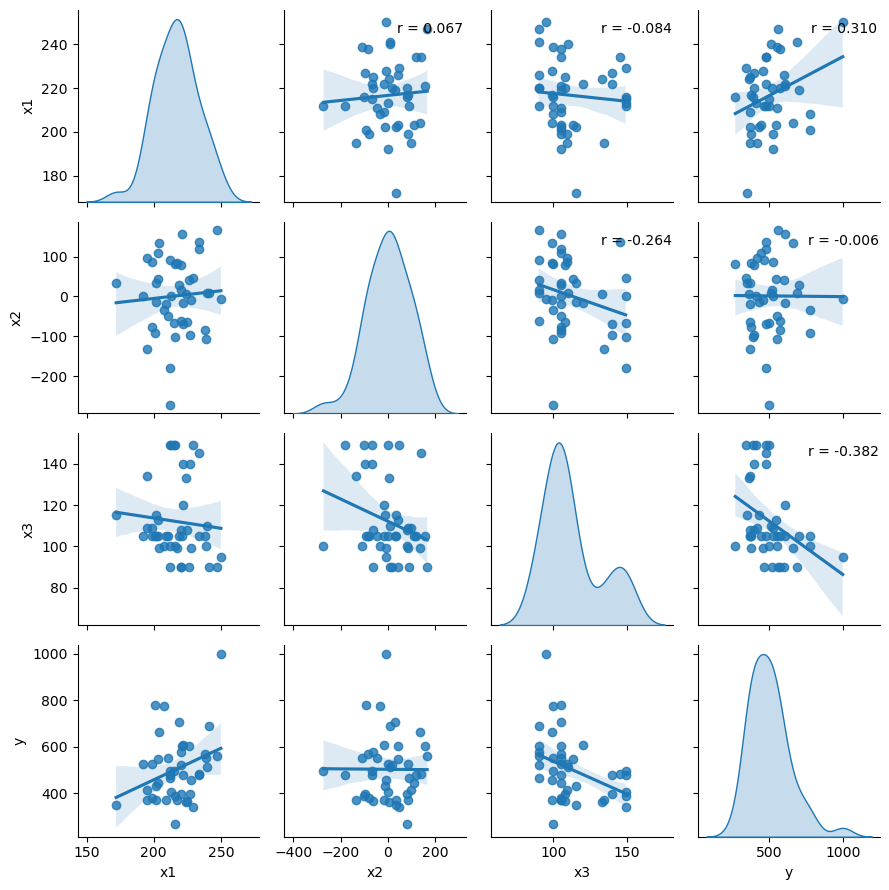

In [43]:
pgrid = sns.pairplot(df, diag_kind="kde",  kind="reg")
pgrid.fig.set_size_inches(9,9)

corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(pgrid.axes, k=1)):
    pgrid.axes[i, j].annotate("r = %.3f" %corr[i,j], (0.8, 0.9), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
#plt.savefig('scatter_matrix.png', dpi=200)

In [44]:
X1 = np.column_stack((np.ones((44,1)), X)  )
X1.shape

(44, 4)

### compute least square solution for b

In [46]:
xinv = np.linalg.inv(np.matmul(X1.T, X1))
b = np.matmul(xinv, np.matmul(X1.T, y ))
b

array([ 2.87435076e+02,  2.49590163e+00, -1.94569799e-01, -2.90083272e+00])

### Compute  y_hat

In [13]:
y_hat = np.matmul(X1,b)

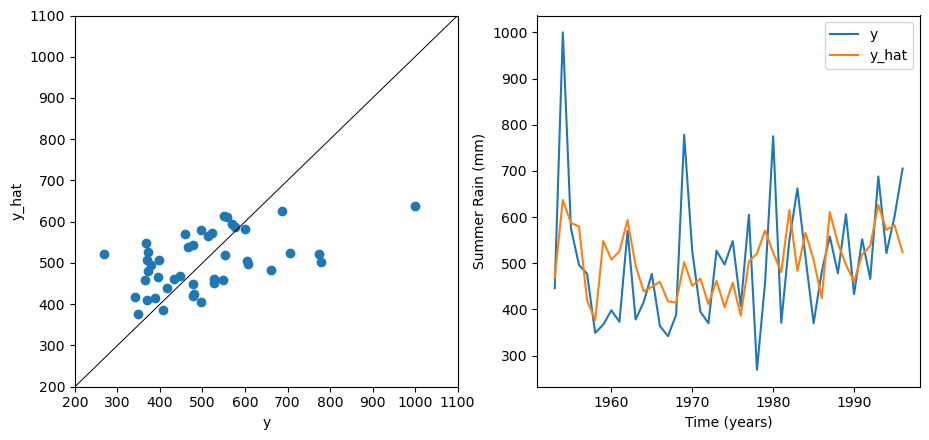

In [47]:
plt.figure(figsize=(9.4, 4.5))
plt.subplot(121)
plt.plot( y, y_hat, 'o')
plt.xlabel('y')
plt.ylabel('y_hat')
plt.axis([200, 1100, 200, 1100])
plt.plot(np.arange(200,1100), np.arange(200,1100), 'k', linewidth=0.7)

plt.subplot(122)
plt.plot(np.arange(1953,1997), y, label='y')
plt.plot(np.arange(1953,1997), y_hat, label='y_hat')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Summer Rain (mm)')
 
plt.tight_layout()
# plt.savefig('Rain_Yangzi.png')

### Explained variances R-square, R2

In [48]:
R2 = np.sum( (y_hat - y_hat.mean())**2)/ np.sum( (y - y.mean())**2)
R  = np.sqrt(R2)
R

0.4890187712759646

### Adjusted R-square

In [49]:
n = 44
p = 3
Ra2 = 1- (n-1)/(n-p-1)*(1-R2)
Ra = np.sqrt(Ra2)
Ra, Ra2

(0.4267022504742309, 0.18207481055977326)

In [50]:
np.corrcoef(y, x1)[0,1], np.corrcoef(y, x2)[0,1], np.corrcoef(y, x3)[0,1]

(0.3103490971336254, -0.0058201959349654, -0.38196034573311477)

In [51]:
np.corrcoef(y, y_hat)[0,1]

0.489018771275965

In [52]:
U = np.sum((y_hat-y_hat.mean())**2)
Syy = np.sum((y-y.mean())**2)
error = y - y_hat
Q = np.sum( (error)**2 )

In [53]:
Syy, U, Q, U+Q

(842894.4318181818, 201569.23384329933, 641325.1979748822, 842894.4318181815)

In [54]:
R2, U/Syy

(0.23913935866025418, 0.23913935866025418)

### Significane tests

In [55]:
F = (np.sum( (y_hat - y_hat.mean())**2 )/3)/ (np.sum( (error)**2 )/(44-3-1))
F

4.190681721323204

In [56]:
import scipy.stats as stats
n = 44; p=3

In [57]:
F_alpha = stats.f.ppf([0.95], p, n-p-1)[0]
F_alpha

2.8387453980206443

### Fi, ti: F and t statistics for b1, b2, b3

In [25]:
for i in range(1,4):
    Fi = b[i]**2*(1/xinv[i,i])/ (Q/(44-3-1))
    ti = b[i]/np.sqrt(xinv[i,i]*Q/(44-3-1)  )
    print('b'+str(i), '  F=', Fi, '  t=', ti)

b1   F= 4.257325173699553   t= 2.0633286635191093
b2   F= 0.8061632077306268   t= -0.8978659185705996
b3   F= 7.471176972394825   t= -2.733345381102583


### compute critical F and t values

In [26]:
F_alpha = stats.f.ppf([0.95], 1, 42)
F_alpha

array([4.07265376])

In [27]:
t_alpha = stats.t.ppf([0.025, 0.975], n-p-1)
print(t_alpha)

[-2.02107538  2.02107538]


### Compare with multiple regression statsmodels.api from python


In [28]:
import statsmodels.api as sm

In [29]:
model = sm.OLS(y,X1)

In [30]:
results = model.fit()

Regression coefficient from OLS

In [31]:
results.params

array([ 2.87435076e+02,  2.49590163e+00, -1.94569799e-01, -2.90083272e+00])

Regression coefficient from the equation 

In [32]:
b

array([ 2.87435076e+02,  2.49590163e+00, -1.94569799e-01, -2.90083272e+00])

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     4.191
Date:                Tue, 18 Mar 2025   Prob (F-statistic):             0.0114
Time:                        11:07:36   Log-Likelihood:                -273.35
No. Observations:                  44   AIC:                             554.7
Df Residuals:                      40   BIC:                             561.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.4351    295.875      0.971      0.337    -310.550     885.420
x1             2.4959      1.210      2.063      0.046       0.051       4.941
x2            -0.1946      0.217     -0.898      0.375      -0.633       0.243
x3            -2.9008      1.061     -2.733      0.009      -5.046      -0.756
==============================================================================
Omnibus:                        7.745   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.604
Skew:                           0.829   Prob(JB):                       0.0368
Kurtosis:                       3.923   Cond. No.                     3.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""